In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/vgames2.csv')

df = df.drop('Unnamed: 0', axis = 1)

df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [3]:
# 값 단위를 통일하기 위한 함수
def change_unit(value):
  if type(value) == float:
    return value
  if 'K' in value:
    return float(value.replace('K','')) * 1000
  elif 'M' in value:
    return float(value.replace('M','')) * 1000000
  else:
    return float(value)


# 각 열의 단위 변경
df['NA_Sales'] = df['NA_Sales'].apply(change_unit)
df['EU_Sales'] = df['EU_Sales'].apply(change_unit)
df['JP_Sales'] = df['JP_Sales'].apply(change_unit)
df['Other_Sales'] = df['Other_Sales'].apply(change_unit)


df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [4]:
# 1. 지역에 따라 선호하는 게임 장르가 다를까?

eu_df =  df[['EU_Sales', 'Genre']]
na_df = df[['NA_Sales', 'Genre']]
jp_df = df[['JP_Sales', 'Genre']]
other_df = df[['Other_Sales', 'Genre']]

eu_df.shape, na_df.shape, jp_df.shape, other_df.shape

((16598, 2), (16598, 2), (16598, 2), (16598, 2))

In [5]:
# 판매량이 0일 경우 데이터에서 제외
eu_df = eu_df[(eu_df.EU_Sales != 0)]
na_df =na_df[(na_df.NA_Sales != 0)]
jp_df = jp_df[(jp_df.JP_Sales != 0)]
other_df = other_df[(other_df.Other_Sales != 0)]

eu_df.shape, na_df.shape, jp_df.shape, other_df.shape

((10868, 2), (12099, 2), (6143, 2), (10121, 2))

In [6]:
# Genre 열을 기준으로 수량 카운트
total_group = eu_df.groupby('Genre').count()
na_group = na_df.groupby('Genre').count()
jp_group = jp_df.groupby('Genre').count()
other_group = other_df.groupby('Genre').count()

# 데이터를 한 곳으로 합치기 
total_group['NA_Sales'] = na_group['NA_Sales']
total_group['JP_Sales'] = jp_group['JP_Sales']
total_group['Other_Sales'] = other_group['Other_Sales']

total_group = total_group.reset_index(drop = False)
total_group

,Genre,EU_Sales,NA_Sales,JP_Sales,Other_Sales
0,Action,2452,2573,1161,2153
1,Adventure,492,544,739,451
2,Fighting,543,594,464,499
3,Misc,957,1204,536,1029
4,Platform,726,798,275,603
5,Puzzle,307,444,155,302
6,Racing,1020,1097,230,852
7,Role-Playing,771,855,1049,800
8,Shooter,1080,1146,378,927
9,Simulation,505,617,270,550


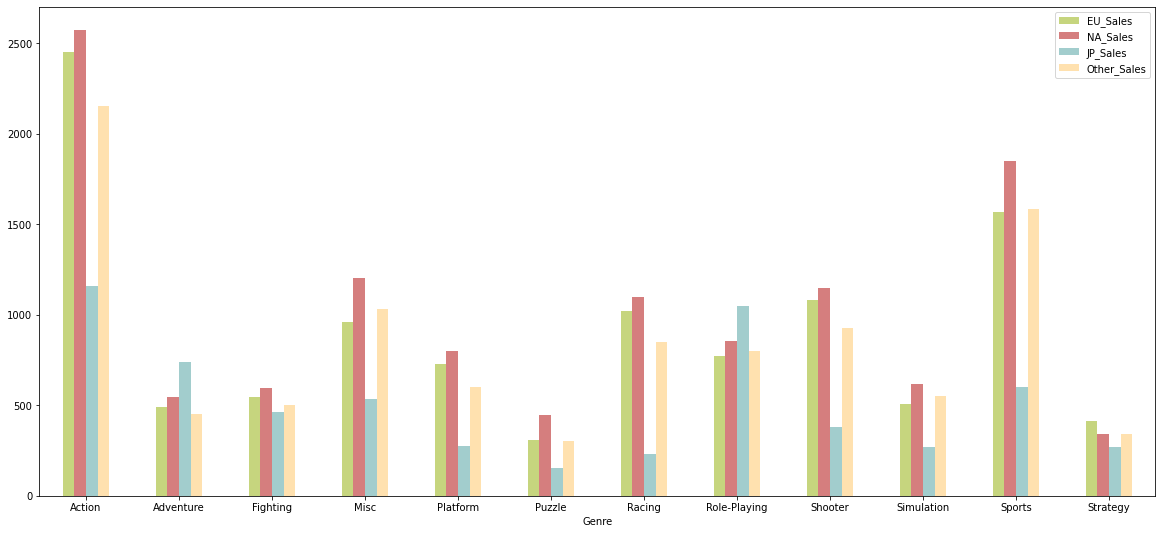

In [7]:
import matplotlib.pyplot as plt


# 가공된 데이터를 막대 그래프로 시각화
total_group.plot(
    x='Genre', 
    y=['EU_Sales', 'NA_Sales', 'JP_Sales', 'Other_Sales'], 
    kind="bar",
    figsize=(20,9), 
    color = ['#C6D57E', '#D57E7E', '#A2CDCD', '#FFE1AF']
)

# x축 글씨가 세로로 나와 회전 0으로 지정
plt.xticks(rotation=0)
plt.show()


In [8]:
# 2. 연도별 게임의 트렌드가 있을까?


# 기존 데이터에서 필요한 열들만 추출
trend = df[['Year', 'Genre']]


# 데이터 결측치 제거 후 1990 년대 이전 데이터 제거
trend = trend[trend['Year'].notna()]

trend = trend[trend.Year > 1990]

trend = trend.reset_index(drop = True)

trend

,Year,Genre
0,2008.0,Action
1,2009.0,Action
2,2010.0,Adventure
3,2010.0,Misc
4,2010.0,Platform
...,...,...
16002,2006.0,Platform
16003,2005.0,Action
16004,2015.0,Sports
16005,2013.0,Action


In [9]:
# Year 열을 기준으로 데이터 그룹화

bins = list(range(1990, 2021, 10))
label = ['1990s', '2000s', '2010s']

trend['label'] = pd.cut(trend['Year'], bins, right = False, labels = label)
trend = trend.drop(['Year'], axis = 1)

In [35]:
# 정확한 수를 계산하기 위해 그룹 별로 데이터를 분할 후 수량 계산

trend_1990 = trend.loc[trend['label'] == '1990s']
trend_2000 = trend.loc[trend['label'] == '2000s']
trend_2010 = trend.loc[trend['label'] == '2010s']

trend_1990 = pd.DataFrame({'1990s': trend_1990.groupby(['Genre']).size()})
trend_2000 = pd.DataFrame({'2000s': trend_2000.groupby(['Genre']).size()})
trend_2010 = pd.DataFrame({'2010s': trend_2010.groupby(['Genre']).size()})

trend_2000.head()

,2000s
Genre,
Action,1573
Adventure,630
Fighting,440
Misc,1015
Platform,559


In [36]:
trend_1990 = trend_1990.reset_index()
trend_2000 = trend_2000.reset_index()
trend_2010 = trend_2010.reset_index()

trend_1990

,Genre,1990s
0,Action,155
1,Adventure,96
2,Fighting,191
3,Misc,115
4,Platform,121
5,Puzzle,69
6,Racing,177
7,Role-Playing,169
8,Shooter,136
9,Simulation,85


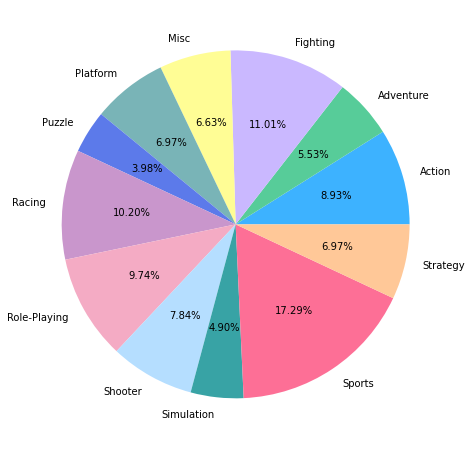

In [46]:
 def chart_pie(x, str):
   fig = plt.figure(figsize = (8, 8))
   fig.set_facecolor('white')

   ax = fig.add_subplot()

   color = ['#3DB2FF', '#57CC99', '#CAB8FF', '#FFFD95', 
           '#79B4B7', '#5C7AEA', '#C996CC', '#F4ABC4', 
           '#B5DEFF', '#38A3A5', '#FD6F96', '#FFC898']

   ax.pie(x = x[str], 
        labels = x['Genre'], 
        autopct = lambda p: '{:.2f}%'.format(p),
        colors = color
        )
   plt.show()



chart_pie(trend_1990, '1990s')

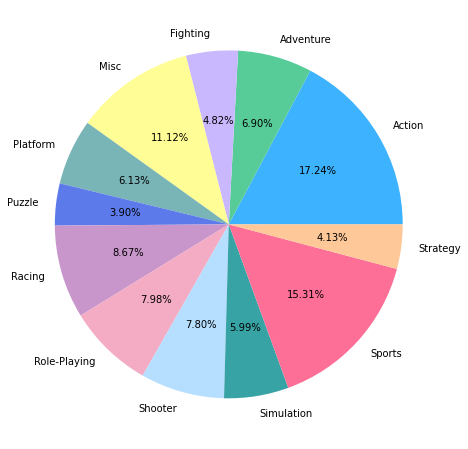

In [47]:
chart_pie(trend_2000, '2000s')

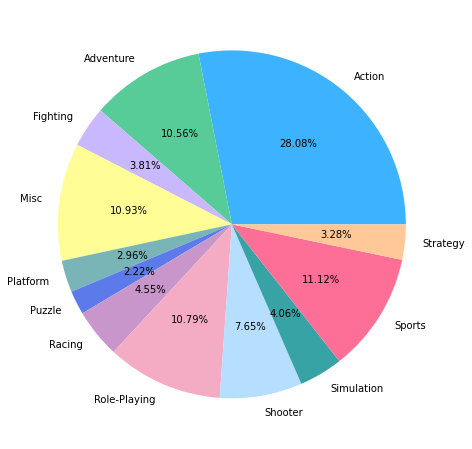

In [48]:
chart_pie(trend_2010, '2010s')

In [21]:
rank_1990s = pd.DataFrame({
    'Genre': res_trend['Genre'],
    'top_rank': res_trend['1990s'].rank(method = 'max', ascending = False)
    })

rank_1990s

,Genre,top_rank
0,Action,5.0
1,Adventure,10.0
2,Fighting,2.0
3,Misc,9.0
4,Platform,8.0
5,Puzzle,12.0
6,Racing,3.0
7,Role-Playing,4.0
8,Shooter,6.0
9,Simulation,11.0
